# R1: **Single product and stochastic environment**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

ADVERTISER: Company
----

single ptoduct

In [2]:
class Company_R1:
    def __init__(self, T, P, B):
        self.N = 1  # one product 
        self.P = P  # Set of possible prices (LIST discrete set)
        self.B = B  # Production capacity budget (INT)

        self.products = B   # ONE product = all capacity in one product
        self.prices = None  # Prices for the product

    def sell_product(self):
        # sell one product
        if self.products > 0:
            #print(f"Products sold, Remained {self.products}")
            self.products -= 1
        else:
            #print("No products to sell")
            pass

    def set_prices(self):   
        # implement the logic to set prices UCB1
        self.prices = 4.0

### BUYER: User

In [3]:
class Buyer:
    def __init__(self, valuations):
        self.valuations = valuations  # list of valuations

    def buy_product(self , time , price):
        if self.valuations[time] >= price:
            return True
        return False  

### ENVIRONMENT: Auction


In [4]:
def plot_round_history(t, company, buyer, purchases):
    print(f"Round {t + 1}:")                            # Print the round number
    print(f"Product quantities: {company.products}")    # Print the quantities of products
    print(f"Buyer valuations: {buyer.valuations[t]}")            # Print the valuations of the buyer
    print(f"Products bought: {purchases}")              # Print the products bought by the buyer
    print("-" * 30)

def plot_regret_history(rounds, regrets, linear_regret):
    plt.figure(figsize=(10, 6))
    plt.plot(rounds, regrets, marker='o', label='Cumulative Regret')                        # Plot cumulative regret
    plt.plot(rounds, linear_regret, linestyle='--', color='red', label='Linear Regret')     # Plot linear regret
    plt.title('Cumulative Regret vs Linear Regret Over Time')
    plt.xlabel('Round')
    plt.ylabel('Regret')
    plt.legend()
    plt.grid()
    plt.show()

In [5]:
class Environment():
    def __init__(self, T, P, B, num_buyers):
        self.T = T
        self.P = P
        self.B = B

        self.num_buyers = num_buyers
        self.company = Company_R1(T, P, B)  # Initialize the company
        self.buyers = self.generate_customers()  # List of customers

    def generate_customers(self):
        buyers = []
        for _ in range(self.num_buyers):
            valuations = np.random.normal(loc=5, scale=1, size=self.T)  # Random valuation between 1 and 10 --> stochastic
            buyers.append(Buyer(valuations))
        return buyers
    
    def simulate_rounds(self):
        cumulative_regret = 0  # Initialize cumulative regret
        cumulative_regrets = []  # List to store cumulative regret for each round
        rounds = []  # List to store round numbers
        linear_regrets = []  # List to store linear regret for comparison

        # Define the slope for linear regret (maximum possible regret per round)
        max_price = max(self.company.P)
        min_price = min(self.company.P)
        regret_slope = max_price - min_price

        for round_num in range(self.T):
            # Step 1: Company sets prices for products
            self.company.set_prices() # --> ucb
            print(f"Round {round_num + 1}: Prices set by company: {self.company.prices} \n")

            # Step 2: User has valuations for products
            # Step 3: User decides which products to buy
            for buyer in self.buyers:
                purchases = buyer.buy_product(round_num, self.company.prices)  # User decides to buy products based on valuations
                if purchases:
                    self.company.sell_product()  # Company decrements product quantities

                # Print round details (pass correct arguments)
                plot_round_history(round_num, self.company, buyer, purchases)

            # Calculate regret (difference between optimal and actual revenue)
            best_price = 5.0
            optimal_revenue = sum(max(best_price - self.buyers[i].valuations[round_num], 0) for i in range(self.num_buyers))    
            actual_revenue = sum(max(self.company.prices - self.buyers[i].valuations[round_num], 0) for i in range(self.num_buyers))
            regret = optimal_revenue - actual_revenue
            cumulative_regret += regret

            # Store data for plotting
            cumulative_regrets.append(cumulative_regret)
            rounds.append(round_num + 1)
            linear_regrets.append(regret_slope * (round_num + 1))

        # Plot cumulative regret and linear regret
        plot_regret_history(rounds, cumulative_regrets, linear_regrets)

### INTERACTION

Round 1: Prices set by company: 4.0 

Round 1:
Product quantities: inf
Buyer valuations: 4.927324299716105
Products bought: True
------------------------------
Round 1:
Product quantities: inf
Buyer valuations: 5.871577550736047
Products bought: True
------------------------------
Round 1:
Product quantities: inf
Buyer valuations: 4.47470637567452
Products bought: True
------------------------------
Round 1:
Product quantities: inf
Buyer valuations: 5.577635177024703
Products bought: True
------------------------------
Round 1:
Product quantities: inf
Buyer valuations: 4.897920177282615
Products bought: True
------------------------------
Round 1:
Product quantities: inf
Buyer valuations: 3.6696482432047484
Products bought: False
------------------------------
Round 1:
Product quantities: inf
Buyer valuations: 6.031444474362496
Products bought: True
------------------------------
Round 1:
Product quantities: inf
Buyer valuations: 5.0247262236980355
Products bought: True
---------------

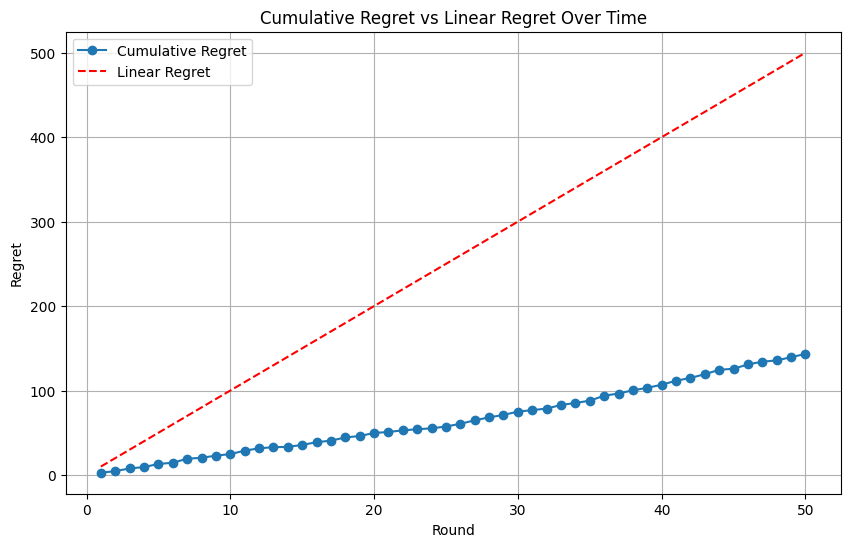

In [6]:
prices = np.linspace(1, 11, 3)  # Example price range from 1 to 10
envi = Environment(50, prices, np.inf, 10)  # Example initialization
envi.simulate_rounds()  # Simulate the rounds of the game